In [65]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
tweets = pd.read_csv('train.csv')
tweets.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [4]:
tweets.describe()

,id,target
count,7613.000000,7613.00000
mean,5441.934848,0.42966
std,3137.116090,0.49506
min,1.000000,0.00000
25%,2734.000000,0.00000
50%,5408.000000,0.00000
75%,8146.000000,1.00000
max,10873.000000,1.00000


# Ubicacion de un tweet

La idea es analizar para ver si podemos encontrar alguna relacion entre la veracidad de los tweets y la ubicacion de los mismos. Primero revisamos como es el estilo de los datos y cuales son los mas frecuentes.

In [75]:
tweets.describe()

,id,target
count,7613.000000,7613.00000
mean,5441.934848,0.42966
std,3137.116090,0.49506
min,1.000000,0.00000
25%,2734.000000,0.00000
50%,5408.000000,0.00000
75%,8146.000000,1.00000
max,10873.000000,1.00000


Armo un plot con el top 50 mas frecuentes ubicaciones para visualizar mejor la distribucion de ellas.

Text(0.5, 1.0, 'Frequencias de cada ubicacion')

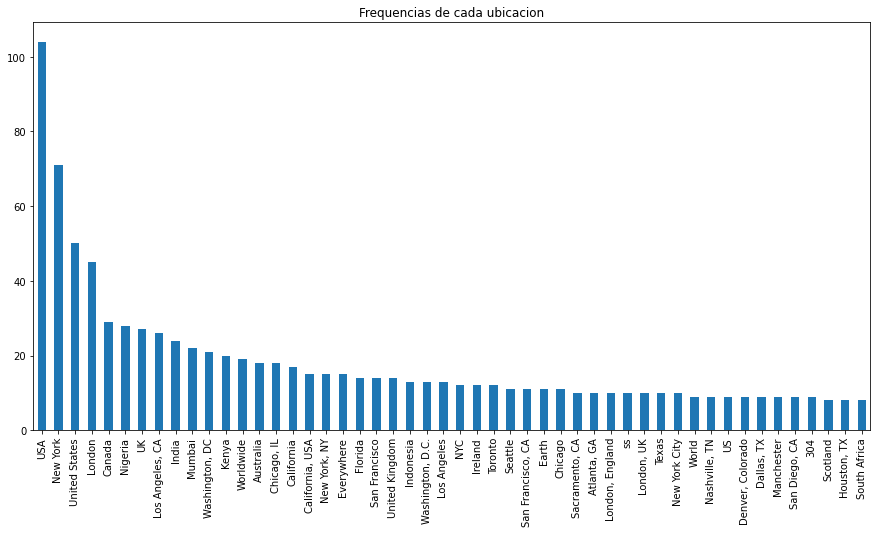

In [227]:
location_counts = tweets['location'].value_counts(dropna=True)
chart = location_counts.head(50).plot.bar(x='Ubicacion', y='Frequencia', figsize=(15,7.5))
chart.set_title('Frequencias de cada ubicacion')

¿Estara relacionada la veracidad de los tweets y la frecuencia de la ubicacion? Vamos a analizarlo agregando 2 columnas nuevas al dataframe. Estas nos van a mostrar la cantidad de tweets verdaderos y de tweets falsos que contiene cada lugar de ubicacion. 

In [260]:
location_df = pd.DataFrame([location_counts]).transpose()
location_df.columns = ['frequency']
location_df.loc[:, 'real_tweet_count'] = location_df.index.map(lambda x: tweets[(tweets['location'] == x)]['target'].sum())
location_df.loc[:, 'fake_tweet_count'] = location_df.index.map(lambda x: tweets[(tweets['location'] == x)]['target'].apply(lambda y: 1 - y).sum())

Tomamos estas columnas nuevas y graficamos los datos para las 50 primeras.

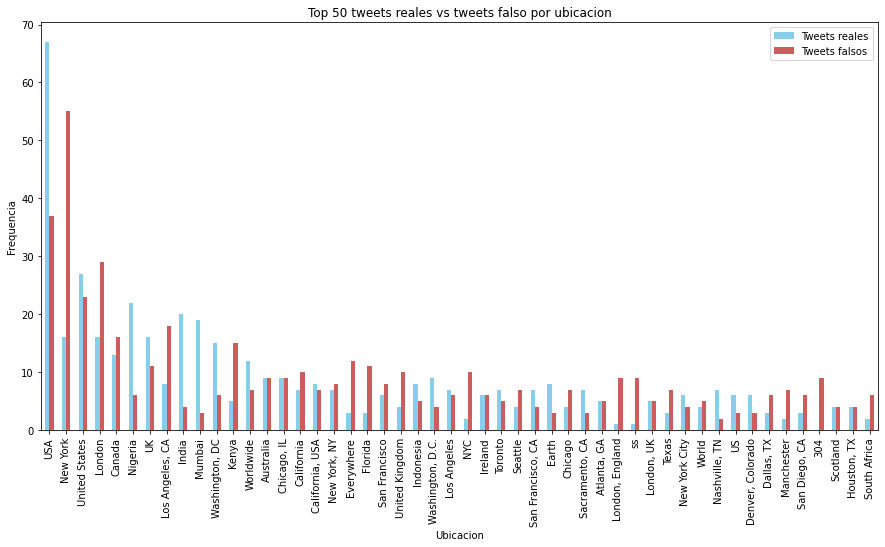

In [123]:
plot_df = pd.DataFrame({"Tweets reales": location_df['real_tweet_count'].head(50), "Tweets falsos": location_df['fake_tweet_count'].head(50)})
ax = plot_df.plot.bar(color=["SkyBlue","IndianRed"], figsize=(15,7.5), title="Top 50 tweets reales vs tweets falso por ubicacion")
ax.set_xlabel("Ubicacion")
ax.set_ylabel("Frequencia")
plt.show()

Como puede verse a primera vista no creo que podamos marcar ningun tipo de relacion entre las ubicaciones mas comunes y la veracidad de los tweets. Aun asi pareceria que las ubicacones con paises tienen un mayor porcentaje de tweets verdaderos. Separo las ubicaciones por paises.

In [264]:
countries = {
    'USA',
    'United States',
    'UK',
    'Canada',
    'Indonesia',
    'Kenya',
    'Nigeria',
    'US',
    'Scotland',
    'Ireland',
    'Australia',
    'United Kingdom',
    'South Africa'
}
countries_available = [x for x in location_counts.index.tolist() if x in countries]
country_df = pd.DataFrame()
for c in countries_available:
    country_df[c] = pd.Series(dtype=object)
country_df = country_df.transpose()
country_df.loc[:, 'Tweets reales'] = country_df.index.map(lambda x: tweets[(tweets['location'] == x)]['target'].sum())
country_df.loc[:, 'Tweets falsos'] = country_df.index.map(lambda x: tweets[(tweets['location'] == x)]['target'].apply(lambda y: 1 - y).sum())


Tomamos estos datos por pais y graficamos

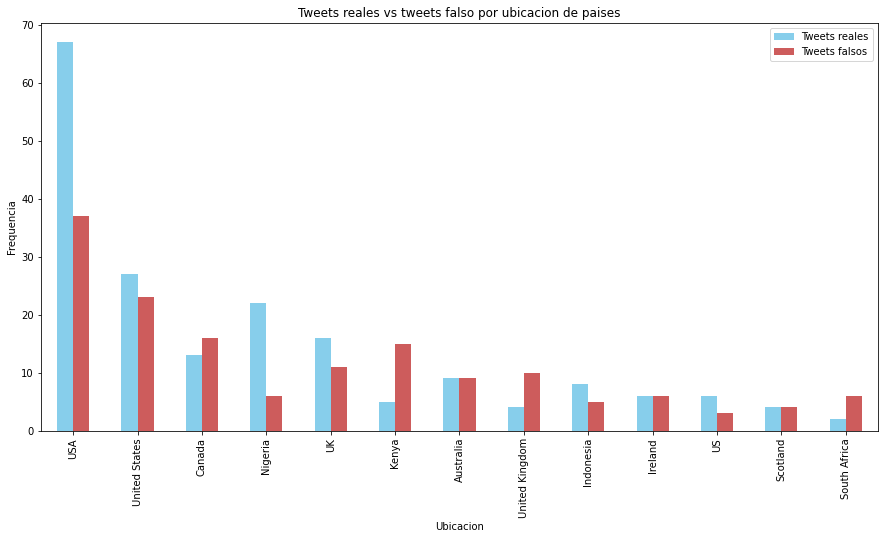

In [265]:
ax = country_df.plot.bar(color=["SkyBlue","IndianRed"], figsize=(15,7.5), title="Tweets reales vs tweets falso por ubicacion de paises")
ax.set_xlabel("Ubicacion")
ax.set_ylabel("Frequencia")
plt.show()

En conclusion si bien pareceria que hay un mayor % de veracidad cuando la ubicacion se trata de un pais, no hay ninguna trend muy notable a la que podamos señalar.

### Ubicaciones invalidas

Ahora si, ¿Que ocurre con las ubicaciones que no representan ninguna ciudad? Voy a filtrar por ubicaciones que contengan caracteres invalidos como \#, ?, numeros y analizo la veracidad de esos tweets. 

In [165]:
invalid_characters_regex = '#|\$|\|%|\?|!|/|;|@|\+|\*|\d'
tweets_with_invalid_locs = tweets[tweets.location.notna() & tweets.location.str.match(invalid_characters_regex)]
tweets_with_invalid_locs

,id,keyword,location,text,target
103,149,aftershock,304,'The man who can drive himself further once th...,0
105,153,aftershock,304,'There is no victory at bargain basement price...,0
107,157,aftershock,304,'Nobody remembers who came in second.' Charles...,0
109,159,aftershock,304,'The harder the conflict the more glorious the...,0
125,180,aftershock,304,Sometimes you face difficulties not because yo...,0
...,...,...,...,...,...
7460,10676,wounds,?Gangsta OC / MV RP; 18+.?,@IcyMagistrate ÛÓher upper armÛÒ those /frig...,1
7471,10688,wreck,1/10 Taron squad,Season 3 of New Girl was such a emotional trai...,0
7499,10727,wreck,709?,I still need to finish the lover but I'm watch...,0
7561,10810,wrecked,6,@Tunes_WGG lol. U got wrecked,0


In [180]:
fake_and_real_tweets_with_invalid = tweets_with_invalid_locs.groupby('target').agg({'target': lambda x: x.size})

Casi el 70% de los tweets que tienen uno de estos caracteres en la ubicacion es falso. Los porcentajes los podemos visualizar mejor con un pie chart.

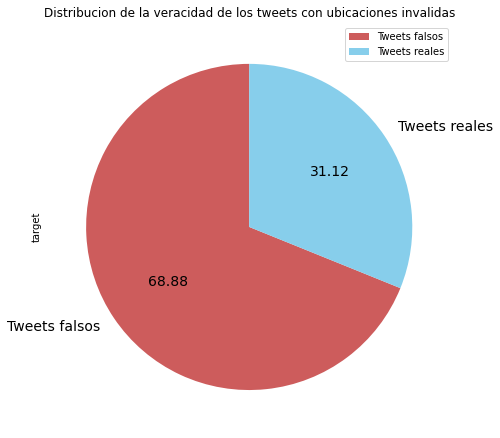

In [187]:
ax = fake_and_real_tweets_with_invalid.plot.pie(fontsize=14,colors=['IndianRed', 'SkyBlue'], labels=['Tweets falsos','Tweets reales'], autopct='%.2f', startangle=90, figsize=(15,7.5), y='target', title="Distribucion de la veracidad de los tweets con ubicaciones invalidas")
plt.show()

### Longitud de la ubicacion y la veracidad

Quiero analizar si hay alguna relacion entre la cantidad de caracteres que tienen las ubicaciones y la veracidad de los tweets. Para esto creo una columna nueva que guarde el length de la ubicacion. Las ubicaciones NaN las tomamos como 0.

In [151]:
tweets_location_length = tweets.copy()
tweets_location_length['location_length'] = [(0 if isinstance(t, float) else len(t)) for t in tweets_location_length['location']]
tweets_location_length

,id,keyword,location,text,target,location_length
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,0
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,0
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,0
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,0
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,0
...,...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1,0
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1,0
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,0
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1,0


Ahora analizamos las longitudes dividiendolas por categoria, reales o no (target 1 o 0)

In [152]:
tweets_location_length.groupby('target').agg({'location_length': ['max', 'min', 'mean']})

location_length              
                   max min      mean
target                              
0                   47   0  9.057577
1                   49   0  9.169061

A simple vista pareceria que la longitud de las ubicaciones de los tweets reales y los falsos tienden a ser muy similares y que no se puede asumir ninguna relacion entre ellos.

Armo un grafico para visualizar la relacion de las longitudes.

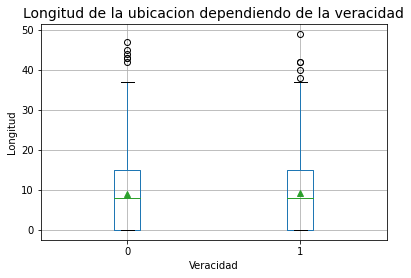

In [159]:
bp = tweets_location_length.boxplot(column='location_length', by='target', showmeans=True)
plt.suptitle("")
bp.set_title('Longitud de la ubicacion dependiendo de la veracidad', fontsize=14)
bp.set_ylabel('Longitud')
bp.set_xlabel('Veracidad')
plt.show()

### Nulalidad de la ubicacion

Viendo el estilo del los datos al inicio podemos observar que la mayoria de las ubicaciones no nulas se encuentran en america del norte o ciudades relacionadas. Pero ¿Cuantos de estas son nulas?. Añado una columna nueva al dataframe para guardar informacion sobre si la ubicacion es nula o no.

In [197]:
loc_tweets = tweets[['location', 'text', 'target']].copy()
loc_tweets.loc[:, 'has_location'] = loc_tweets['location'].notna()
loc_tweets.head()

,location,text,target,has_location
0,NaN,Our Deeds are the Reason of this #earthquake M...,1,False
1,NaN,Forest fire near La Ronge Sask. Canada,1,False
2,NaN,All residents asked to 'shelter in place' are ...,1,False
3,NaN,"13,000 people receive #wildfires evacuation or...",1,False
4,NaN,Just got sent this photo from Ruby #Alaska as ...,1,False


Y ahora dividimos el analisis en 2 partes

#### Tweets sin ubicacion

Ahora si, ¿Cuantos tweets sin ubicacion tenemos?

In [202]:
tweets_without_loc = loc_tweets[loc_tweets['has_location'] == False].copy()
len(tweets_without_loc)

2533

¿Como es la distribucion de los tweets sin ubicacion? Armo una tabla y Grafico

In [220]:
def real_tweets(x):
    return sum([1 for y in x if y == 1])

def fake_tweets(x):
    return sum([1 for y in x if y == 0])

tweets_without_loc[['target', 'location']].groupby('target').agg(lambda x: x.size)

,location
target,
0,1458
1,1075


De los tweets sin ubicacion pareceria que la mayoria se compone de tweets falsos

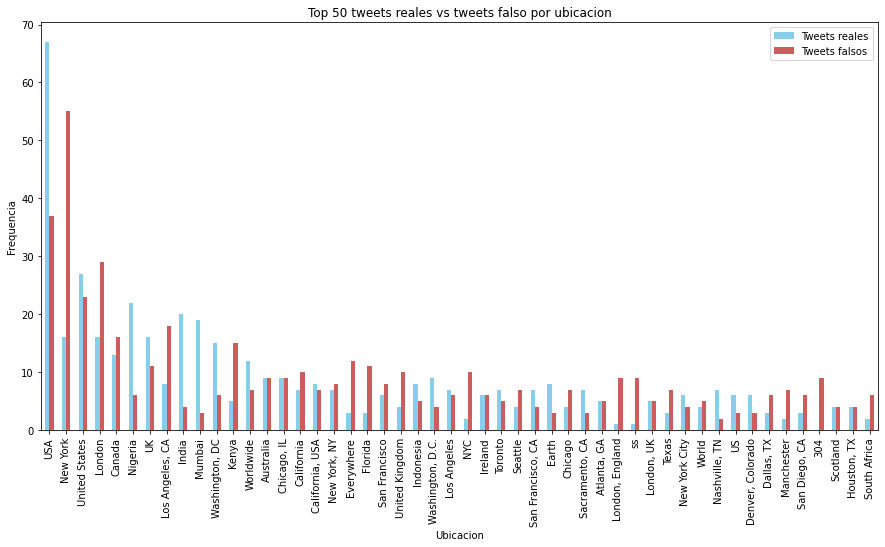

In [266]:
plot_df = pd.DataFrame({"Tweets reales": location_df['real_tweet_count'].head(50), "Tweets falsos": location_df['fake_tweet_count'].head(50)})
ax = plot_df.plot.bar(color=["SkyBlue","IndianRed"], figsize=(15,7.5), title="Top 50 tweets reales vs tweets falso por ubicacion")
ax.set_xlabel("Ubicacion")
ax.set_ylabel("Frequencia")
plt.show()

#### Tweets con ubicacion

¿Cuantos tweets con ubicacion tenemos?

In [204]:
tweets_with_loc = loc_tweets[loc_tweets['has_location'] == True].copy()
len(tweets_with_loc)

5080

¿Tendremos algun tipo de relacion entre la ubicacion y el texto? Creo una nueva columna `location_in_text` que represente si la ubicacion esta mencionada en el texto.

In [205]:
in_text = tweets_with_loc.apply(lambda x: x['location'] in x['text'], axis=1)
tweets_with_loc.loc[:, 'location_in_text'] = in_text
tweets_with_loc.head()

,location,text,target,has_location,location_in_text
31,Birmingham,@bbcmtd Wholesale Markets ablaze http://t.co/l...,1,True,False
32,Est. September 2012 - Bristol,We always try to bring the heavy. #metal #RT h...,0,True,False
33,AFRICA,#AFRICANBAZE: Breaking news:Nigeria flag set a...,1,True,True
34,"Philadelphia, PA",Crying out for more! Set me ablaze,0,True,False
35,"London, UK",On plus side LOOK AT THE SKY LAST NIGHT IT WAS...,0,True,False


In [207]:
def real_tweets(x):
    return sum([1 for y in x if y == 1])

def fake_tweets(x):
    return sum([1 for y in x if y == 0])

tweets_with_loc[['target', 'location_in_text']].groupby('location_in_text').agg({'target': [fake_tweets, real_tweets]})

target            
                 fake_tweets real_tweets
location_in_text                        
False                   2864        2156
True                      20          40

A partir de esta informacion no podemos concluir mucho ya que muy pocos tweets mencionan la ubicacion en el tweet. Aun asi podemos ver que de los que mencionan la ubicacion en el tweet el 66% son reales.